<a href="https://colab.research.google.com/github/Hockeens/Hockeens/blob/main/Hockeens_CAR_INSURANCE_PREMIUM_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#INTRODUCTION TO MY DATASET AND MY INTENDED PURPOSE

# **INTRODUCTION**

In today's data driven world,understanding the dynamics of car insurance premiums is essential for both consumers and insurance service providers.

The vehicle insurance industry heavily relies on accurate data to assess risk,set premiums and develope competitive policies.

The dataset encompasses various attributes related to car insurance premiums which serves as foundation for exploring factors that influence pricing and policyholder behaviors.

**Objectives**
  
  - Perform data cleaning and preprocessing on this dataset to ensure its accuracy and rediness for analysis.
  - Carry out Exploratory Data Analysis(EDA),visualize and summarize key features,uncover correlations and identify trends within the data.
  - Carry out A/B testsing to statisically assertain specific areas within our dataset that influence key decisions.

**Project Aim**
    - Refining the dataset to draw meaningful insights that reveal trends and patterns in insurance policies thereby enabling insurers to make informed decisions and enhancing customer's understanding of what influences their rates.

This analysis not only influences strategic decision making but will also foster transparency in the factors contributing to car insurance policies.

In [2]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Display to 2 decimal points
pd.options.display.float_format = '{:.2f}'.format

# Loading Dataset

In [3]:
#Loading data
file_path = '/content/car_insurance_premium_dataset.csv'

data = pd.read_csv(file_path)
data

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55
...,...,...,...,...,...,...,...
995,23,5,3,22,2020,5,500.00
996,43,8,3,17,2023,2,494.55
997,21,3,5,19,1998,27,506.05
998,36,18,1,23,2011,14,491.45


# Data Cleaning and Preprocessing

In [4]:
#Checking for missing numbers
data.isna().sum()

,0
Driver Age,0
Driver Experience,0
Previous Accidents,0
Annual Mileage (x1000 km),0
Car Manufacturing Year,0
Car Age,0
Insurance Premium ($),0


In [5]:
#Checking for duplicates
data.duplicated().sum()

0

In [6]:
#checking the info of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Driver Age                 1000 non-null   int64  
 1   Driver Experience          1000 non-null   int64  
 2   Previous Accidents         1000 non-null   int64  
 3   Annual Mileage (x1000 km)  1000 non-null   int64  
 4   Car Manufacturing Year     1000 non-null   int64  
 5   Car Age                    1000 non-null   int64  
 6   Insurance Premium ($)      1000 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


In [7]:
#Checking the data types
data.dtypes

,0
Driver Age,int64
Driver Experience,int64
Previous Accidents,int64
Annual Mileage (x1000 km),int64
Car Manufacturing Year,int64
Car Age,int64
Insurance Premium ($),float64


In [8]:
#Cheking for the data shape
columns ,rows = data.shape
print(f'Rows: {rows}\nColumns: {columns}')

Rows: 7
Columns: 1000


In [9]:
#Checking data colums
data.columns

Index(['Driver Age', 'Driver Experience', 'Previous Accidents',
       'Annual Mileage (x1000 km)', 'Car Manufacturing Year', 'Car Age',
       'Insurance Premium ($)'],
      dtype='object')

In [10]:
#Checking for the number of unique values of our data
data.nunique()

,0
Driver Age,48
Driver Experience,41
Previous Accidents,6
Annual Mileage (x1000 km),15
Car Manufacturing Year,36
Car Age,36
Insurance Premium ($),414


**Insight**

- Our data is clean and ready for analysis as there are no missing values, duplicates or outliers to be treated

# Exploratory Data Analysis

In [11]:
#Iterating through our data to show the number of unique values in our columns
columns = ['Driver Age', 'Driver Experience', 'Previous Accidents',
       'Annual Mileage (x1000 km)', 'Car Manufacturing Year', 'Car Age',
       'Insurance Premium ($)']

for col in columns:
  no_unique_values = data[col].nunique()
  print(f'Number of unique values in {col} is {no_unique_values}')

Number of unique values in Driver Age is 48
Number of unique values in Driver Experience is 41
Number of unique values in Previous Accidents is 6
Number of unique values in Annual Mileage (x1000 km) is 15
Number of unique values in Car Manufacturing Year is 36
Number of unique values in Car Age is 36
Number of unique values in Insurance Premium ($) is 414


In [12]:
#Check summary statistics
data.describe()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41.58,14.76,2.57,17.93,2007.64,17.36,493.74
std,13.77,10.54,1.70,4.41,10.36,10.36,5.91
min,18.00,0.00,0.00,11.00,1990.00,0.00,477.05
25%,30.00,6.00,1.00,14.00,1999.00,8.00,489.49
50%,42.00,13.00,3.00,18.00,2008.00,17.00,493.95
75%,53.00,23.00,4.00,22.00,2017.00,26.00,498.31
max,65.00,40.00,5.00,25.00,2025.00,35.00,508.15


In [13]:
#DESCRIPTIVE STATISTICS FUNCTION

def descriptive_stats(data):

    numeric_cols = data.select_dtypes(include=['int','float']).columns

    stats_detail = {} #Create an empty dictionary

    for col in numeric_cols :

      #print(f'The col in loop is{col}')
      variance     = np.var(data[col])
      std_dv       = np.std(data[col])
      mean         = np.mean(data[col])
      median       = np.median(data[col])
      perc_25      = np.percentile(data[col],25)
      perc_75      = np.percentile(data[col],75)
      IQR          = perc_75 - perc_25
      max          = np.max(data[col])
      min          = np.min(data[col])
      range        = max - min
      skewness     = data[col].skew()
      kurtosis     = data[col].kurtosis()


      #print(variance,std_dv,mean,median,perc_25,perc_75,iqr,max,min )

      stats_detail[col] = { 'variance'            :variance,
                            'Standard Deviation'  :std_dv,
                            'mean'                :mean,
                            'median'              :median,
                            'perc_25'             :perc_25,
                            'perc_75'             :perc_75,
                            'iqr'                 :IQR,
                            'MAX'                 :max,
                            'MIN'                 :min,
                            'RANGE'               :range,
                            'SKEWNESS'            :skewness,
                            'KURTOSIS'            :kurtosis
                            }

    stats_data = pd.DataFrame(stats_detail)
    return stats_data

In [14]:
stats_data = descriptive_stats(data)
stats_data

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
variance,189.30,111.07,2.88,19.43,107.29,107.29,34.89
Standard Deviation,13.76,10.54,1.70,4.41,10.36,10.36,5.91
mean,41.58,14.76,2.57,17.93,2007.64,17.36,493.74
median,42.00,13.00,3.00,18.00,2008.00,17.00,493.95
perc_25,30.00,6.00,1.00,14.00,1999.00,8.00,489.49
perc_75,53.00,23.00,4.00,22.00,2017.00,26.00,498.31
iqr,23.00,17.00,3.00,8.00,18.00,18.00,8.82
MAX,65.00,40.00,5.00,25.00,2025.00,35.00,508.15
MIN,18.00,0.00,0.00,11.00,1990.00,0.00,477.05
RANGE,47.00,40.00,5.00,14.00,35.00,35.00,31.10


## **1. Univariate Analysis**

In [15]:
data.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55


**Histplot to show the distribution of different variables in the dataset**

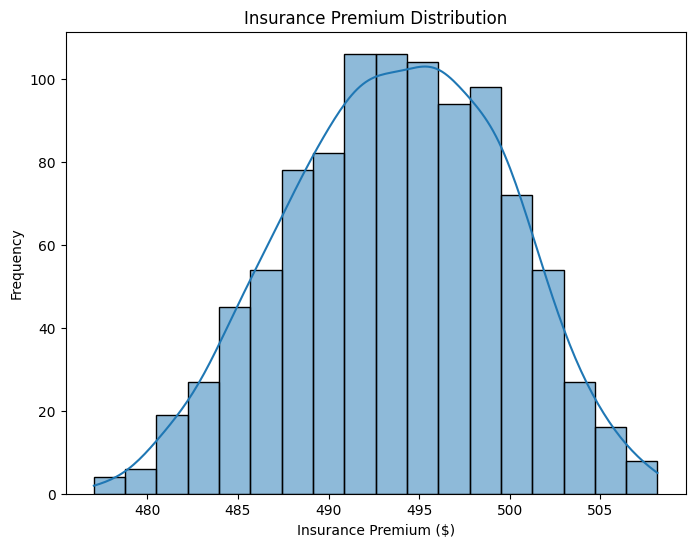

In [16]:
#Histplot showing distribution of the insurance premium
plt.figure(figsize=(8,6))
sns.histplot(data['Insurance Premium ($)'],kde=True)
plt.title('Insurance Premium Distribution')
plt.xlabel('Insurance Premium ($)')
plt.ylabel('Frequency')
plt.show()



**Insights**

- Most of the Insurance premium policy rates are centered around the $493.
- The insurance premium has a normal distribution

In [17]:
#Create a new accident column to show if a vehicle is accident free

data['Accident'] = data['Previous Accidents'].apply(lambda x: 'Yes' if x > 0 else 'No')
data.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($),Accident
0,56,32,4,17,2002,23,488.35,Yes
1,46,19,0,21,2025,0,486.15,No
2,32,11,4,15,2020,5,497.55,Yes
3,60,0,4,19,1991,34,498.35,Yes
4,25,7,0,13,2005,20,495.55,No


**Checking the distribution of cars that have had accidents and those that are accident free**

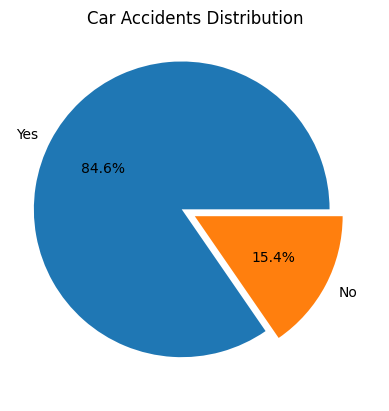

In [18]:
#Pie chart showing previous accidents distribution

Accident_Prone = data['Accident'].value_counts()
figure =plt.figsize=(14,10)
plt.pie(Accident_Prone, labels=Accident_Prone.index, autopct='%1.1f%%',explode=(0.1,0))
plt.title('Car Accidents Distribution')
plt.show()

**Insight**

> - Majority of the vehicles taking car premiums have been involved in an accident before.
> - Only 15.4% of the vehicles taking covers are accident free.

In [19]:
#Creating a 4 group driver lelel columns,bins= Young Adults,Adults,Middle Age and Senior

data['Driver Age Group'] = pd.qcut (data['Driver Age'] ,q=4,labels=['Young Adults','Adults','Middle Age','Seniors'])
data.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($),Accident,Driver Age Group
0,56,32,4,17,2002,23,488.35,Yes,Seniors
1,46,19,0,21,2025,0,486.15,No,Middle Age
2,32,11,4,15,2020,5,497.55,Yes,Adults
3,60,0,4,19,1991,34,498.35,Yes,Seniors
4,25,7,0,13,2005,20,495.55,No,Young Adults


**Comparing the influence of drivers age group on accidents**

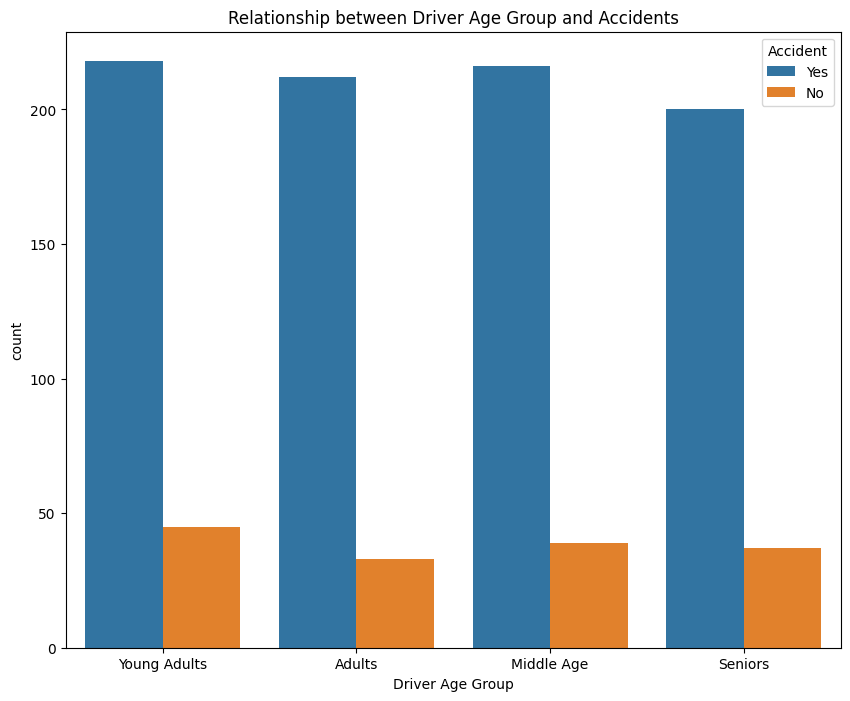

In [20]:
#Countplot showing relationship between Driver Age Group and Accidents
plt.figure(figsize=(10,8))
sns.countplot(data = data, x= 'Driver Age Group',hue='Accident');
plt.title('Relationship between Driver Age Group and Accidents')
plt.show()

**Insights**

> 1. Young adults are the most prone to accidents, This can be attributed to their lack of experience.
> 2. Senior Citizens are the least prone to make accidents due to their experience in driving.
> 3. Due to their large numbers Young Adults are also leading with the number of accident free premium holders followed by Middle Age,Seniors then Adults.

**Checking the distribution of drivers who have taken insurance premiums for their cars according to their age groups**

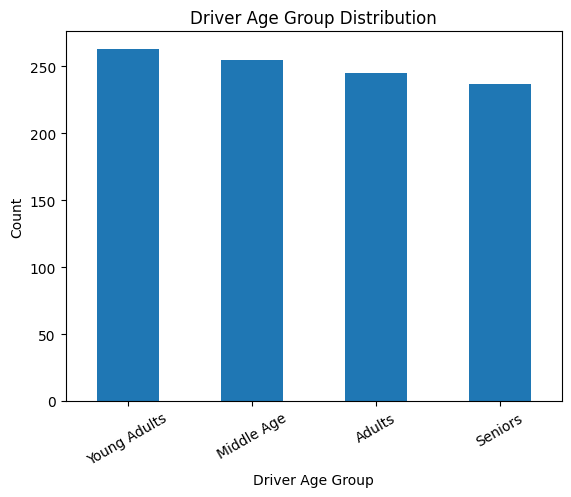

In [21]:
#Bar showing the distribution of drivers age groups
figure= plt.figsize=(14,10)
data['Driver Age Group'].value_counts().plot(kind='bar')
plt.title('Driver Age Group Distribution')
plt.xlabel('Driver Age Group')
plt.ylabel('Count')
plt.xticks(rotation = 30)
plt.show()

**Insights**

> * Most of the drivers taking car premiums are young adults ,followes closely by Middle Aged, Adults then Senior citizens

## **2. Bivariate Analysis**

**Investigating if the Driver Age Group of influences insurance premium amount**

Text(0.5, 1.0, 'Insurance Premium by Driver Age Group')

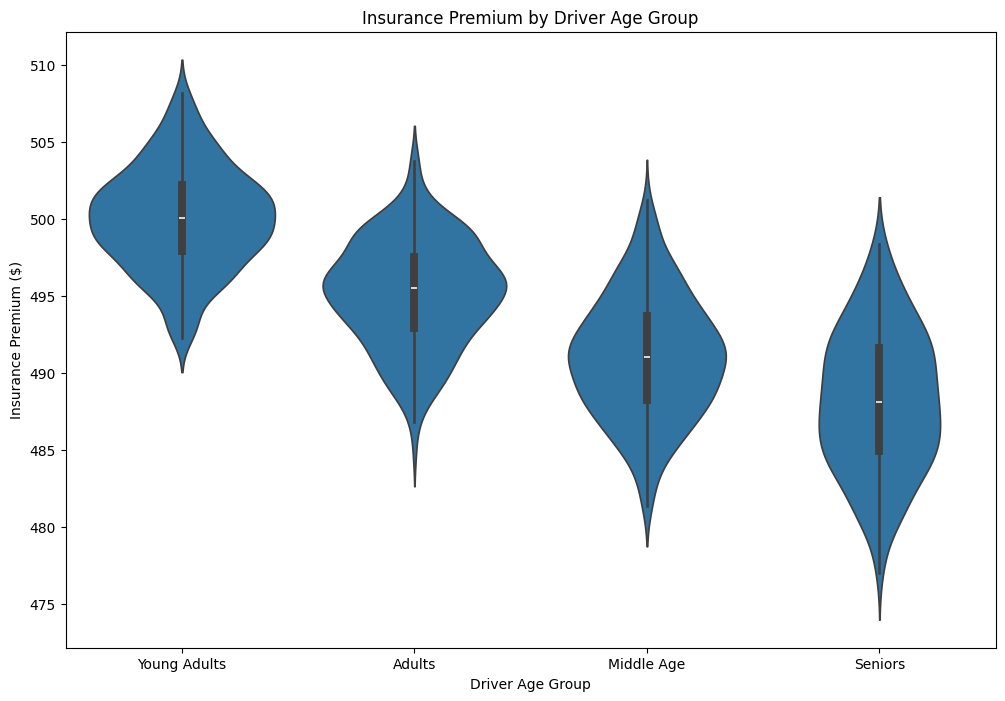

In [22]:
#Violinplot showing age of the driver infuence on the premium amount
plt.figure(figsize=(12,8))
sns.violinplot(data=data,x='Driver Age Group',y='Insurance Premium ($)')
plt.title('Insurance Premium by Driver Age Group')

**Insights**

- Young Adults are subjected to pay the most insurance premiums.
- Senior Citizens are paying the least amount in insurace premiums.

**Ivestigating the number of previous accidents in relation to driver age groups**

In [23]:
#Pivot table showing the number of previous acidents in relation to the driver age group
Age_Groups_Accidents = pd.pivot_table(data,index='Driver Age Group',values='Previous Accidents',aggfunc='count')
Age_Groups_Accidents

,Previous Accidents
Driver Age Group,
Young Adults,263
Adults,245
Middle Age,255
Seniors,237


**Insight**

- Young Adults have the most number of accidents,this can attribute to the high insurance premiums the are subjected to.
- Senior Citizens have the least number of accidents,this can attribute to the low amount of premiums they are  subjected to pay.

**Investigating if the age of the car influences insurance premium amount**

In [24]:
#Creating a car age level column into 4 groups; New,Slightly Used,Used,Old.

data['Car Type'] = pd.qcut(data['Car Age'] ,q=4,labels=['New','Slightly Used','Used','Old'])
data.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($),Accident,Driver Age Group,Car Type
0,56,32,4,17,2002,23,488.35,Yes,Seniors,Used
1,46,19,0,21,2025,0,486.15,No,Middle Age,New
2,32,11,4,15,2020,5,497.55,Yes,Adults,New
3,60,0,4,19,1991,34,498.35,Yes,Seniors,Old
4,25,7,0,13,2005,20,495.55,No,Young Adults,Used


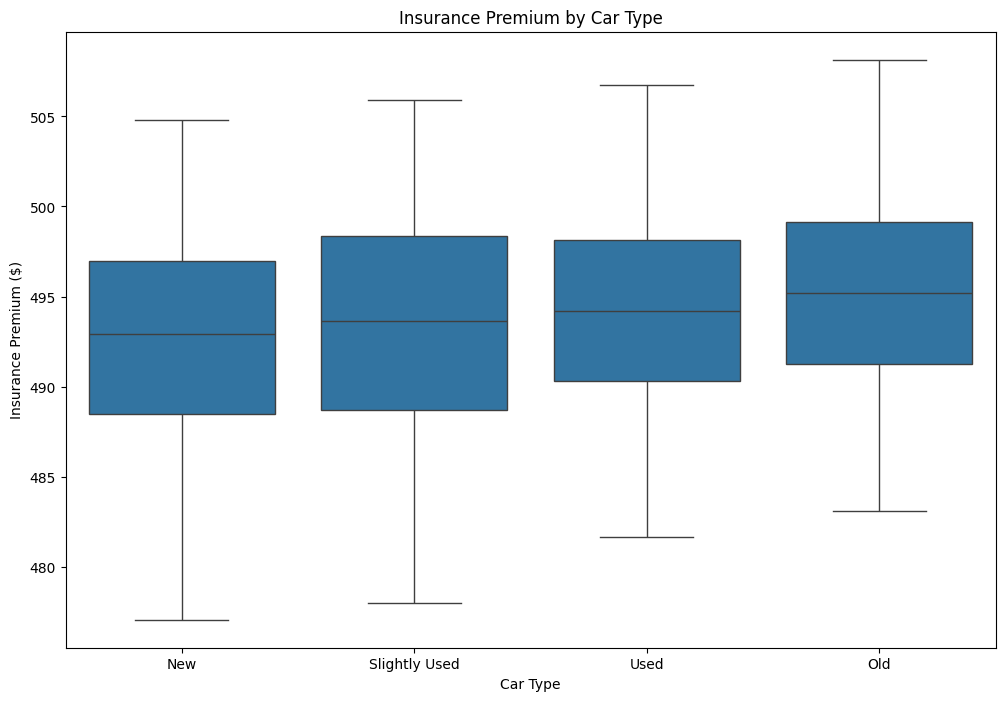

In [25]:
#Box plot showing the relationship between car age level and Insurance Premium

plt.figure(figsize=(12,8))
sns.boxplot(data=data,x='Car Type',y='Insurance Premium ($)')
plt.title('Insurance Premium by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Insurance Premium ($)')
plt.show()

**Insights**

> * Old cars are subjected to higher rates of insurance premiums as compares to used and slightly used cars.
  - Old cars are at higher risks of breaking down this may mean that they are entitled to more coverage hence the insurer passes down the risks to the old vehicles policy holders.

> * New cars are subjected to low insurance premium rates as compared to slightly used,used and old in that particular order.

In [26]:
#Lets use a pivot table to investigate the type of car and accidents

Car_Type_Accidents = pd.pivot_table(data,index='Car Type',values='Previous Accidents',aggfunc='count')
Car_Type_Accidents

,Previous Accidents
Car Type,
New,258
Slightly Used,257
Used,245
Old,240


**Investigating how the number of previous accidents affects the insurance premium amount.**

Text(0, 0.5, 'Insurance Premium ($)')

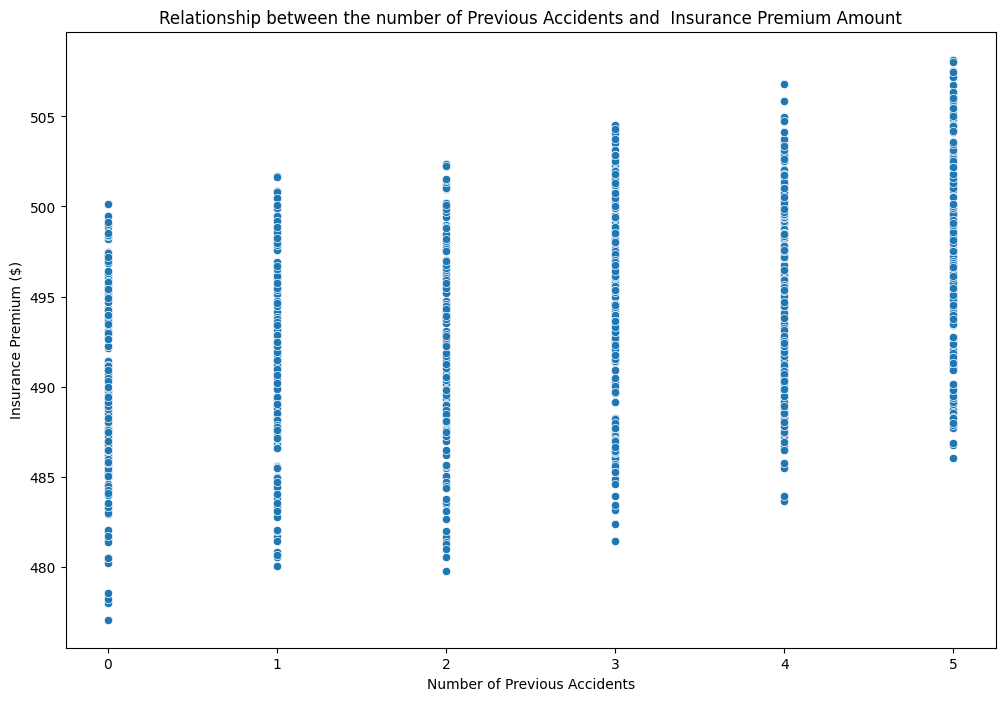

In [27]:
#Scatter plot to show the realationship between Previous Accidents and insurance premium

plt.figure(figsize=(12,8))
sns.scatterplot(data=data,x='Previous Accidents',y='Insurance Premium ($)')
plt.title('Relationship between the number of Previous Accidents and  Insurance Premium Amount')
plt.xlabel('Number of Previous Accidents')
plt.ylabel('Insurance Premium ($)')

**Insights**

Drawing the conclusion as :
- The higher the number of previous accidents ,the higher the premium amount.
    - High number of previous accidents equates to more numnber of claims,This subjects the insurer pass down the risk to the policy hoder by imposing higher insurance premiums.

- The lower the number of previous accidents the lower the premium amount.

## **3. Multvariate Analysis**

In [28]:
data.head(3)

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($),Accident,Driver Age Group,Car Type
0,56,32,4,17,2002,23,488.35,Yes,Seniors,Used
1,46,19,0,21,2025,0,486.15,No,Middle Age,New
2,32,11,4,15,2020,5,497.55,Yes,Adults,New


###** Correlation Analysis**

**Investigating the correlation among the numerical variables of our dataset.**

In [29]:
#Creating a correlation variable to hold our numerical varriables
corr_data = data.select_dtypes(include=['int','float']).corr()
corr_data

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
Driver Age,1.00,0.61,0.03,0.06,0.01,-0.01,-0.78
Driver Experience,0.61,1.00,0.02,-0.01,-0.04,0.04,-0.80
Previous Accidents,0.03,0.02,1.00,0.01,-0.03,0.03,0.41
Annual Mileage (x1000 km),0.06,-0.01,0.01,1.00,-0.00,0.00,0.02
Car Manufacturing Year,0.01,-0.04,-0.03,-0.00,1.00,-1.00,-0.17
Car Age,-0.01,0.04,0.03,0.00,-1.00,1.00,0.17
Insurance Premium ($),-0.78,-0.80,0.41,0.02,-0.17,0.17,1.00


**Heatmap shaowing correlation of numerical variables in the dataset**

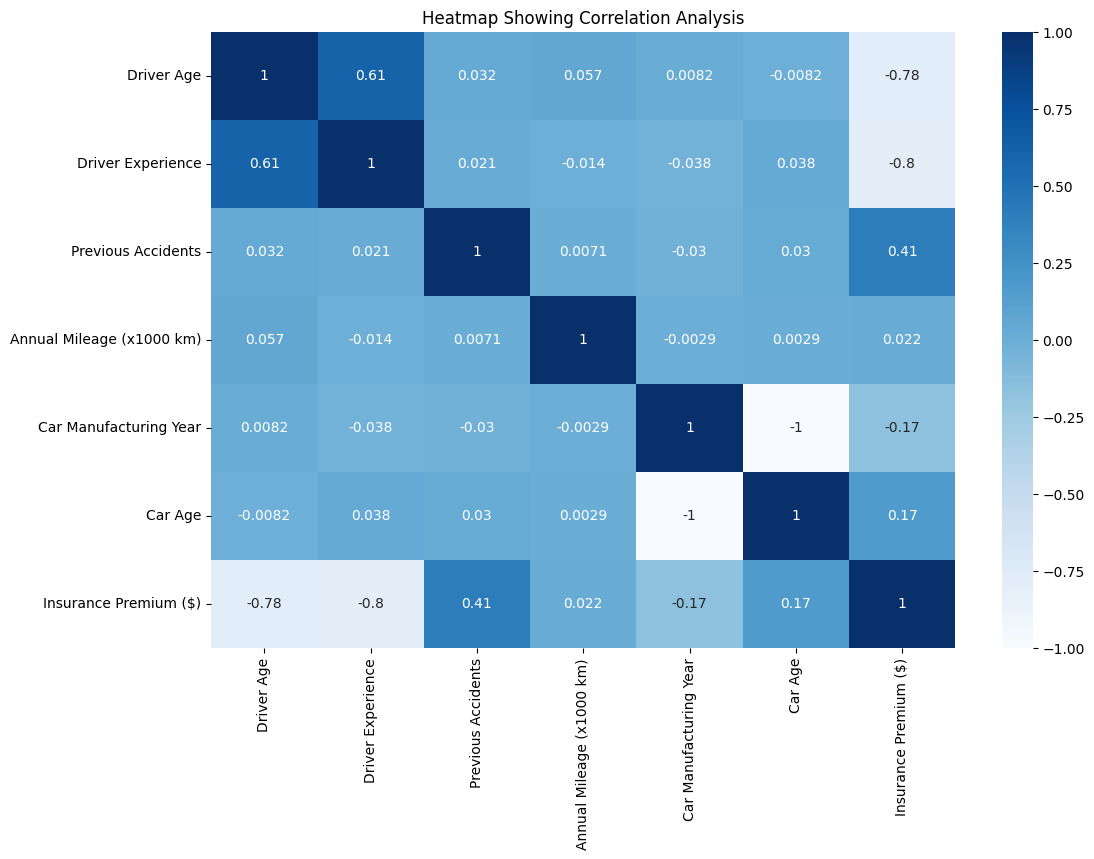

In [30]:
#Heatmap showing the correlation of our numerical varriables
plt.figure(figsize=(12,8))
sns.heatmap(corr_data ,annot=True,cmap='Blues')
plt.title('Heatmap Showing Correlation Analysis')
plt.show()

**Insights**

> 1. There is a positive correlation between the Drivers Age and Drivers level of experience.
  - The more a person drives the more they get driving experience over the years.

> 2.  There is also a positive correlation between the number of previous accidents and insurance premium.
  - Insurance providers are usually keen on assessing whether one is at risk of being in an accident and the probabilty of one making a claim,this eventually leads to an increase in insurance premium once one makes a claim,the higher the number of claims the higher the likelihood of increased insurance premium.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

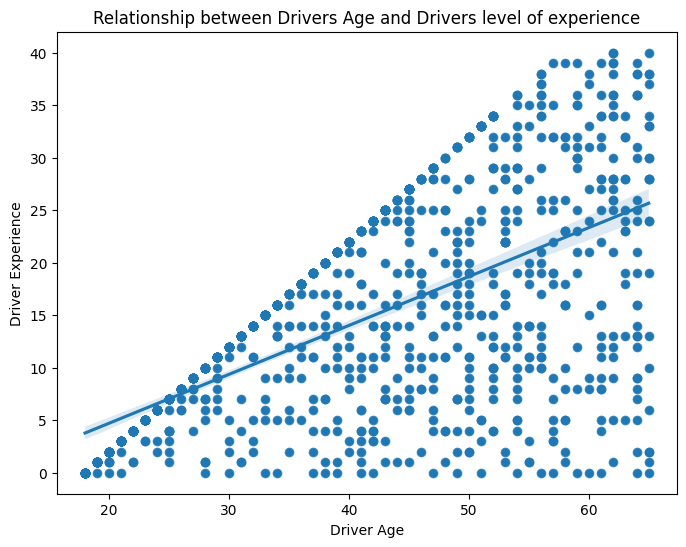

In [31]:
#Scatterplot with a regression line to show the correlation between Drivers Age and Drivers level of experience.

plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Driver Age',y='Driver Experience')
sns.regplot(data=data,x='Driver Age',y='Driver Experience')
plt.title('Relationship between Drivers Age and Drivers level of experience')
plt

**Insights**

> - An increase in Driver age leads to an increase in driver experience.
>- This shows a strong positive correlation.

In [32]:
data.head(2)

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($),Accident,Driver Age Group,Car Type
0,56,32,4,17,2002,23,488.35,Yes,Seniors,Used
1,46,19,0,21,2025,0,486.15,No,Middle Age,New


##**4. Hypothesis Testing**

The purpose of this hypothesis is to analyze the effect of annual mileage on car insurance premiums using a dataset comprising various parameters influencing car insurance costs. We will conduct hypothesis testing to assess whether there is a statistically significant relationship between annual mileage and the amount of car insurance premiums.

## Dataset Description

The dataset includes the following columns:

1. *Annual Mileage (miles)*: The total distances driven by the insured car over a year.
2. *Insurance Premium ($)*: The cost of insurance premiums paid by the car owner annually

**1. Formulating Hypothesis as follows:**

**H0 (Null Hypothesis) :** There is no significant effect of annual mileage on car insurance premiums.

**H1 (Alternative Hypothesis):** There is a significant effect of annual mileage on car insurance premiums.

**2. The Significance Level set Alpha(α) is at 0.05 or 5%**, There is an acceptance of 5% chance of a Type I error.

**3. Choosing the Appropriate Test to show normality of the variables being tested.**

  - In this instance Shapiro Wilk normality test is ideal



In [33]:
#Normality test of the independent variables being tested
Annual_Mileage_Test = stats.shapiro(data['Annual Mileage (x1000 km)'])
Insurance_Premium_Test = stats.shapiro(data['Insurance Premium ($)'])

print(f'Annual Mileage Test: {Annual_Mileage_Test}')
print(f'Insurance Premium Test: {Insurance_Premium_Test}')

Annual Mileage Test: ShapiroResult(statistic=0.9387466563237455, pvalue=7.212674578252847e-20)
Insurance Premium Test: ShapiroResult(statistic=0.9940771696447221, pvalue=0.0005500230454827381)


In [37]:
#Checking if p value is less than the Alpha
p_value = 7.212674578252847e-20 < 0.05
p_value = 0.0005500230454827381 < 0.05

#Print whether its true or false
print(f'{p_value}\nThe p_values are less than 0.05.')

True
The p_values are less than 0.05.


**Insight**

- The p_values of Annual Mileage and Insurance Premiums are below the set Alpha of 0.05%.
- This proves that the distribution of the independent variables being tested is normal.

**4.Calculate the Test Statistic and p-value A test statistic.**

**Two Sample T-Test is ideal*
  - The varriables being tested are two independent groups consisting of continuos numerical values.

In [35]:
#Two Sample T-test .
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(data['Annual Mileage (x1000 km)'], data['Insurance Premium ($)'])

print("\nTwo-Sample t-Test Results:")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value:     {p_value:.3f}")


Two-Sample t-Test Results:
T-statistic: -2040.421
P-value:     0.000


**5. Interpretation of the Two sample ttest results.**

---



In [36]:
# Interpretation of the Results
alpha = 0.05

print("\nInterpretation:")

if p_value > alpha:
    print("Fail to Reject the Null Hypothesis (H0). ")
else:
    print("Reject the Null Hypothesis (H0).")


Interpretation:
Reject the Null Hypothesis (H0).


**6. Conclusion from the hypothesis test.**

*There is a significant relationship between Annual Mileage and Insurance Premium,which supports the alternative hypothesis.*

   - Higher Annual Mileage is associated with higher premiums due to increased risks ,This leads to price price adjustments based on driving habits.

**Recomendation**

The analysis reveals a statistically significant relationship between annual mileage and car insurance premiums, suggesting that insurers may raise premiums for drivers who have higher annual mileage due to an increased risk of accidents, claims, and overall exposure. Insurance companies may want to consider mileage as a critical factor in their underwriting and pricing strategies.